Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Frederick Oakley"
COLLABORATORS = ""

---

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>:Frederick Oakley<br>
<b>NetID</b>:fjo25<br>
<b>Recitation (1/2/3/4)</b>:1<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="http://nbacademicintegrity.rutgers.edu/home/academic-integrity-policy/">http://nbacademicintegrity.rutgers.edu/home/academic-integrity-policy/ </a><br>
<b>Initials</b>: FO     (eg: DC for Dingbang Chen)

</div>

## CS 439 - Introduction to Data Science
## Spring 2024

# Lab 5: Unsuprvised Learning - Image Processing

### Due Date : Sunday April 28, 2024 by 11:59 PM.


### About this Lab
Any given color image can be considered a matrix of pixels where each pixel contains (R,G,B) values between 0-255. Each color is represented as an unsigned 8-bit integer. Grayscale images are represented by one byte per pixel. In this lab, we will learn how to read grayscale images into an ndarray or data frame and manipulate them to do some interesting operations on the image collection. We will use kmeans to cluster a set of images and understand how well they are being clustered into correct segments using k-means. 

### Clustering Images
Given a repository of images of handwritten digits, we can use unsupervised learning methods such as k-means to group the images into k clusters. Ideally with k=10, we should be able to group all images of 0,1,...,9 into 10 clusters. However, in practice this may not be possible as per reasons discussed in the lecture. In this part of the lab, we will look for the minimum k, that will provide us with the representation of all digits from 0 to 9. For the image data set, we will use the 1700+ low resolution 8x8 handwritten digit images from sklearn and apply k-means algorithm to find how well it can group/cluster into similar digits. 

#### Install scikit-learn - DO THIS ONLY ONCE

In [1]:
!pip install --user scikit-learn

### Part 1 - Load digits and visualize
Load the digits from sklearn into an image array. Print the first 5 images. 

(1797, 64)
[0 1 2 ... 8 9 8]


<Figure size 640x480 with 0 Axes>

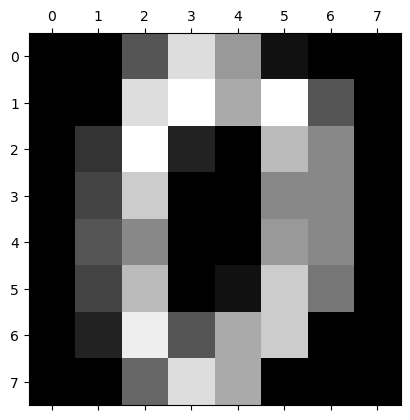

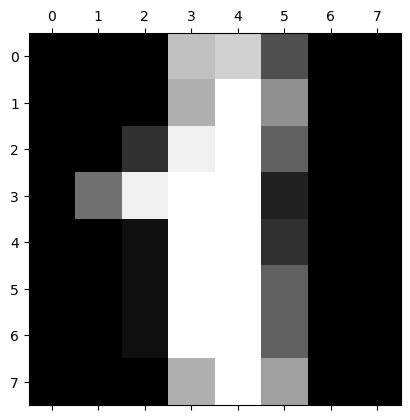

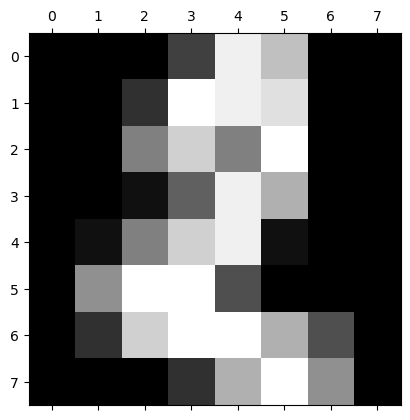

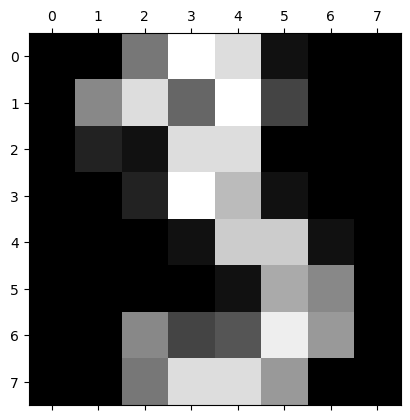

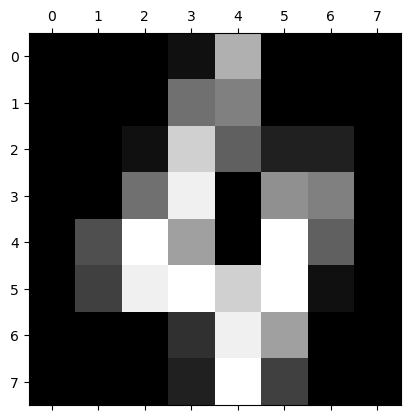

0


In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.target)   # actual labels of the images
import matplotlib.pyplot as plt
plt.gray()
for k in range(5):
    #print(digits.target[k])
    plt.matshow(digits.images[k])
plt.show()
print(digits.target[0])

### Task 1.1 Identify first 5 images
Visually identify the first 5 images as one of the digits from 0,1..9. Just do your best to see if the image can be identified. Write your answer below.

01234

### Task 1.2  Flatten the 2D images
The original images are 8x8 matrices of integers who values are between 0-255. Flatten them to represent images as dimension 64 vectors. You should have ~1797 flatten images. We will use these vectors in the kmeans algorithm as our data vectors. Store each image as a row in the matrix called flatten_images. The flatten_images should be dimension n x 64 where n is the number of images downloded. The shape of the flatten images should be (1797, 64)

In [3]:
import numpy as np
## BEGIN WORK
flatten_images = digits.images.reshape((digits.images.shape[0], -1))

flatten_images.shape

(1797, 64)

### Task 1.3 About the image data set
The data set contains number of handwritten digits that are labeled as 0..9. If we put the images into clusters based on image label, write code to show the number of images from each of the 10 clusters. You are allowed to post the answers (not the code) to discussion board to check with others.

In [4]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=10, random_state=42)
clusters = k_means.fit_predict(flatten_images)

cluster_counts = np.bincount(clusters)

for i, count in enumerate(cluster_counts):
    print(f"Cluster {i} contains {count} images")


Cluster 0 contains 193 images
Cluster 1 contains 146 images
Cluster 2 contains 181 images
Cluster 3 contains 173 images
Cluster 4 contains 166 images
Cluster 5 contains 178 images
Cluster 6 contains 173 images
Cluster 7 contains 167 images
Cluster 8 contains 172 images
Cluster 9 contains 248 images


## Part 2 Implement kmeans
We note that, as the images are labeled, any supervised learning algorithm can be applied to this collection of images. However, our objective in this lab is to see if we can use unsupervided learning methods such as k-means to cluster images (w/o considering their labels). 
In this part, we will implement and study the properties of kmeans algorithm. The pseudo code for kmeans algorithm is given by

<img src="shared/images/kmeans.jpg" alt="Alt text" height="350" width="500">

### Task 2.1 kmeans++
Original k-means algorithm choose cluster centers at random. However, kmeans++ allows the selection of initial centers away from each other to avoid cluster centers converging together and loss converging to a local minima. 
The algorithm for kmeans++ (selecting initial cluster centers) is given by

<img src="../../shared/images/kmeans_pp.jpg" alt="Alt text" height="100" width="300">

GIven below is an implementation of kmeans++. Study the implementation of the algorithm carefully. 

In [5]:
import numpy as np

def kmeans_plus(X, k):
    # Select the first cluster center randomly
    centers = [X[np.random.choice(X.shape[0], 1, replace=False)][0]]

    # Select the remaining cluster centers using k-means++
    for i in range(1, k):
        # Compute the distances to the nearest cluster center for each data point
        distances = np.min(np.sum((X - centers[-1])**2, axis=1)[:, np.newaxis], axis=1)

        # Compute the probabilities of each data point being selected as the next cluster center
        probs = distances / np.sum(distances)

        # Select the next cluster center randomly, weighted by the probabilities
        centers.append(X[np.random.choice(X.shape[0], 1, replace=False, p=probs)][0])

    return np.array(centers)
Mu = kmeans_plus(flatten_images, 3)   
Mu   # print the initial centers with k = 3

array([[ 0.,  0.,  7., 16., 12.,  1.,  0.,  0.,  0.,  0., 16., 11., 16.,
         8.,  0.,  0.,  0.,  0.,  3.,  9., 16.,  6.,  0.,  0.,  0.,  0.,
         0., 13., 16., 15.,  1.,  0.,  0.,  0.,  1.,  2.,  5., 14.,  8.,
         0.,  0.,  5., 14.,  0.,  0.,  9., 15.,  0.,  0.,  4., 16.,  7.,
         6., 13., 14.,  0.,  0.,  0.,  7., 16., 16., 16.,  4.,  0.],
       [ 0.,  0.,  1., 15., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  5.,  0.,  0.,  0.,  0.,
         8., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,
         0.,  0.,  0., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 15., 15.,  2.,  0.,  0.,  0.,  3., 16.,  9., 16.,
         5.,  0.,  0.,  0.,  5.,  9.,  1., 16.,  1.,  0.,  0.,  0.,  0.,
         0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  

### Complexity Question. 
What is the complexity or big O of kmeans_plus code above? (not the kmeans algorithm itself) Express the answer using m (number of data points), n (dimension of each data point), k (number of clusters)

O(m*n)

### Task 2.2 Is kmeans++ always better than random?  Testing this with a simple data set
In original k-means algorithm, we choose initial centers at random. As discussed in lectures, this can lead to centers that will make error converging to local minimas. In this task, we are exploring if the idea of using kmeans++ is a better way to choose the initial centers than choosing them at random.

Write the code below to test how random and kmeans++ choose initial centers with k=2.  
We will test this with the 2D data set  [1, 1], [0, 1], [1, 0], [2, 1], [1, 2], [3, 2], [2, 3], [4, 10], [10, 4], [5, 5] of 10 points. Define the error as the sum of the manhattan distances of each point from the "closest' centers. Run the random algorithm t iterations (t=10, 15, 25, 50, 100) and record total errors in each case. For each t, print the probability that k-means++ choose centers better than the random algorithm? It is possible that random selection can sometimes work better than kmeans++. Run a few times to form an opinion.

In [6]:
# manhattan distance for 2D vectors
def manhattan(x, y):
    return (abs(x[0]-y[0]) + abs(x[1]-y[1]))

In [7]:
import numpy as np
X = np.array([[1, 1], [0, 1], [1, 0], [2, 1], [1, 2], [3, 2], [2, 3], [4, 10], [10, 4], [5, 5]])

pairs = np.array([[i, j] for i in range(0, 11) for j in range(0, 11)])
np.random.shuffle(pairs)
X_random = pairs[:10]
#print(X_random)

n = 10   # num points
list_iter = [10, 15, 20, 25, 50, 100]   # num iterations list
## BEGIN WORK
# error = sum of manhattan distances of each point from closest centers
better_kmeans_plus=0
for num in list_iter:
    for j in range(num):
        k_means_random = KMeans(n_clusters=n, init='random', random_state=42)
        k_means_random.fit_predict(X_random)
        centers_random = k_means_random.cluster_centers_

        
        #k_means_random.fit(X)   
        centers_plus = kmeans_plus(X,num)
        #prob = (difference_plus < difference_randoms) / itera
        #print(centers_random)
        #print(centers_plus)
        if np.sum(manhattan(X, centers_plus)) < np.sum(manhattan(X, centers_random)):
            better_kmeans_plus += 1
            #print(better_kmeans_plus)
    prob = better_kmeans_plus / num
    better_kmeans_plus=0

    #print(f'Difference for {list_iter} is {difference}')
    print(f'probability for better kmeans for t={num} is {prob}')

    
    



probability for better kmeans for t=10 is 1.0
probability for better kmeans for t=15 is 1.0
probability for better kmeans for t=20 is 1.0
probability for better kmeans for t=25 is 1.0
probability for better kmeans for t=50 is 0.98
probability for better kmeans for t=100 is 0.96


#### Explain your observations
Based on what you observed above, do you think that using kmeans++ to choose centers for the most part a better idea than choosing initial centers randomly? Explain briefly.

### Task 2.3 Implement k-means algorithm using Matrix forms
Implement k-means using Matrix Form (see lecture notes). We will do max iterations of 100 or until the difference between prev_error and current_error is less than $10^{-5}$ whichever comes first. The function will return the k-centers (Mu) and loss. Your loss generally will go down as you increase k. Show the loss from k=10 to k=30 (inclusive)

##### Activity 2.3.1
Run the kmeans algorithm with random initial points

In [8]:
import numpy as np
k=10
## BEGIN WORK
def kmeans_matrix(X, k, max_iter=100, rand_seed=0):
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        C = np.eye(k)[np.argmin(D,axis=1),:]
        Mu = (C.T @ X)/np.sum(C,axis=0)[:,None]
    loss = np.linalg.norm(X-Mu[np.argmin(D,axis=1),:])**2
    return Mu, loss

for i in range(10,31):
    Mu, loss = kmeans_matrix(flatten_images, i)
    print('k=', i, ' ', loss)

k= 10   1215707.4686436828
k= 11   1144896.1257471065
k= 12   1103646.432208788
k= 13   1089543.3345082242
k= 14   1051501.3007092783
k= 15   1056753.3535151654
k= 16   1010004.3210252526
k= 17   1021358.4063045053
k= 18   992390.5762667703
k= 19   987377.4375894837
k= 20   944484.3217527524
k= 21   945308.3033208767
k= 22   935796.430915665
k= 23   2159057.291040623


/tmp/ipykernel_467932/2046122181.py:9: RuntimeWarning: invalid value encountered in divide
  Mu = (C.T @ X)/np.sum(C,axis=0)[:,None]


k= 24   920335.2943758495
k= 25   904309.1917011915
k= 26   902352.4330929237
k= 27   878201.9367895972
k= 28   2159057.291040623
k= 29   862766.7483186108
k= 30   842822.41431708


##### Activity 2.3.2
Run the kmeans algorithm with kmeans++ initial points. You can use the same code for kmeans_matrix from previous part

In [9]:
import numpy as np
k=10
## BEGIN WORK
np.seterr(all='raise')
def kmeans_matrix(X, k, max_iter=100, rand_seed=0):
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        C = np.eye(k)[np.argmin(D,axis=1),:]
        Mu = (C.T @ X)/np.sum(C,axis=0)[:,None]
    loss = np.linalg.norm(X-Mu[np.argmin(D,axis=1),:])**2
    return Mu, loss


for i in range(10,31):
    Mu, loss = kmeans_matrix(flatten_images, i)
    print('k=', i, ' ', loss)

k= 10   1165406.6829341336
k= 11   1185665.7788198905
k= 12   1110969.7048149281
k= 13   1096596.6455704405
k= 14   1079956.726728594
k= 15   1042603.4270267909
k= 16   1038912.5117383057
k= 17   1031250.9140743177
k= 18   1004922.4726176355
k= 19   978024.9496897066
k= 20   948594.1294481586


FloatingPointError: invalid value encountered in divide

#### Question: Random vs kmeans++
Based on 2.3.1 and 2.3.2, Do you notice a difference in loss in random vs kmeans++? Run it multiple times to form an opinion.



Yes, on average, kmeans returns a lower loss with random points versus using kmeans++ initial points.

#### Question : k vs loss
Based on observations above when k=10,11, ....30. Does the loss always go down? or some other behavior? Run it multiple times to form an opinion.

While loss tends to go down on the long run if good initial points are chosen, sometimes we can see the loss get stuck at local minima and increase highly or slightly before stabilizing at k=30.

### Task 2.4 Alternate implementation of k-means
This is an alternate implementation of k-means to matrix implementation. Later we will compare the two implementations to see how they compare in performance. 

In [11]:
import numpy as np

def kmeans_alt(X, k, max_iter=100):
    
    # randomly initialize k centroids
    Mu = X[np.random.choice(X.shape[0], size=k, replace=False)]
    # choose initial means using kmeans++
    #Mu = kmeans_pp(flatten_images, k)
    prev_loss = np.inf
    for i in range(max_iter):
        # assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - Mu, axis=2)
        cluster_assignment = np.argmin(distances, axis=1)

        # compute loss function
        loss = np.sum(np.square(np.min(distances, axis=1)))
        
        # recompute centroids as the mean of the assigned data points
        for j in range(k):
            Mu[j] = np.mean(X[cluster_assignment == j], axis=0)

        # check for convergence
        if np.abs(prev_loss - loss) < 1e-5:
            break
        prev_loss = loss
    return cluster_assignment, Mu, loss

for i in range(10,31):
    cluster_assignment, Mu, loss = kmeans_alt(flatten_images, i)
    print('k=', i, ' ', loss)

k= 10   1241225.4915508921
k= 11   1143595.5567816845
k= 12   1126605.3683932978
k= 13   1077011.779491058
k= 14   1077851.208838713
k= 15   1085252.578152735
k= 16   1014618.4775988171
k= 17   994370.0512118178
k= 18   992584.5579423402
k= 19   966034.8377858301
k= 20   957776.2584235277
k= 21   960330.504322848
k= 22   953871.7855344824
k= 23   917015.7137652424
k= 24   939654.9623350755
k= 25   897432.8928416081
k= 26   885911.3630803663
k= 27   898544.8221075507
k= 28   866983.4135081512
k= 29   862018.2298279537
k= 30   845012.4872397091


### Activity 2.4.1 Complexity of kmeans++ algorithm
kmeans++ chooses the intiial centers. Then the kmeans algorithm computes the new centers while recomputing cluster centers multiple times. What is the total complexity of kmeans++ in terms of m(total data points), n(dimension of each data point), k(cluster size), t (number of iterations)

## Part 3 - Images in a Cluster

### Task 3.1 images in a specific cluster
All images in the collection will be placed into one of the k clusters. In this activity, we find the images of a particular cluster. For example, we need to find all images in the cluster, say 12 for example. Complete the code below to display the index of the images in flatten images and their labels. In this activity, you should see majority of the images in a cluster are quite similar. Print the dominant image in the cluster and print the images in the cluster to verify. Change the cluster number and make more observations. 

8
dominant entry:  8


/tmp/ipykernel_467932/1357923006.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(image)


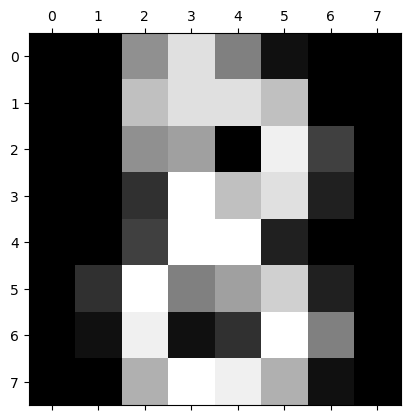

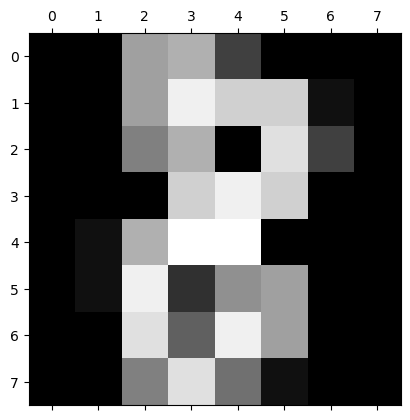

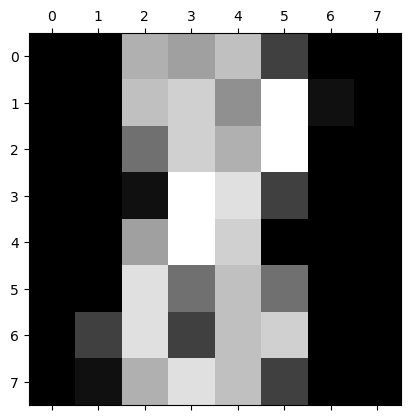

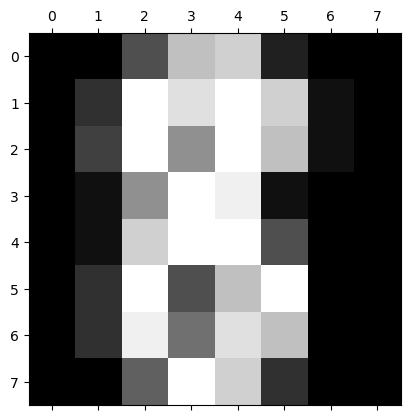

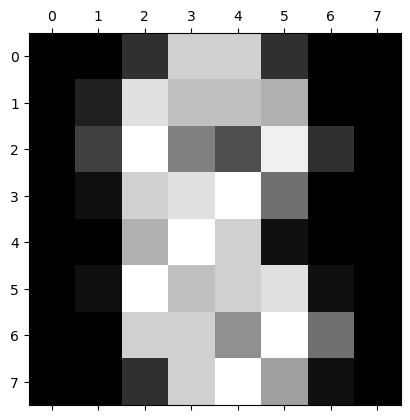

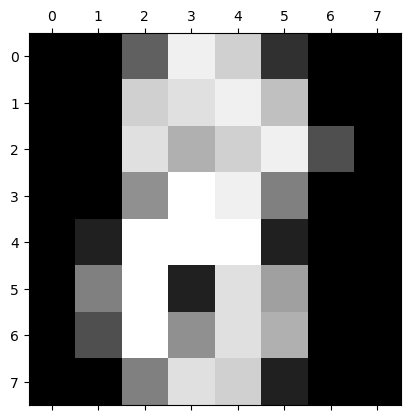

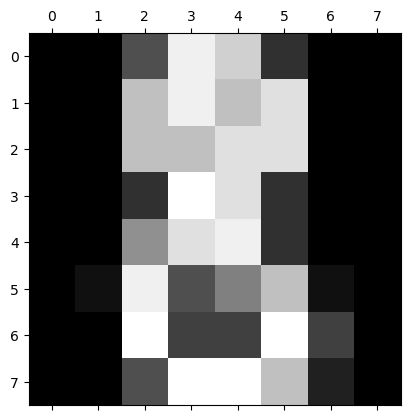

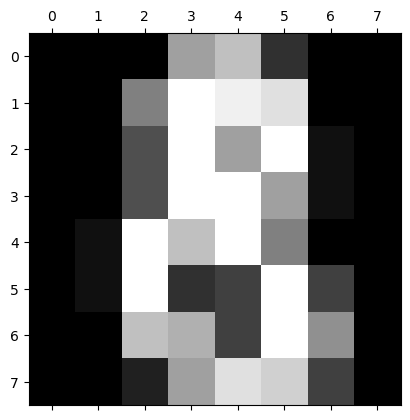

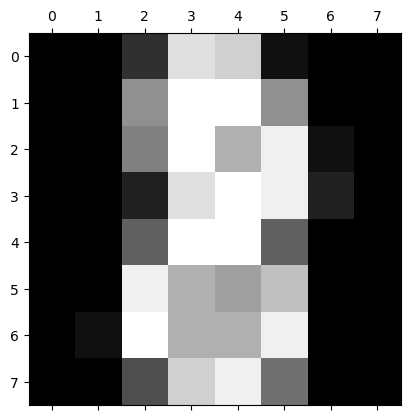

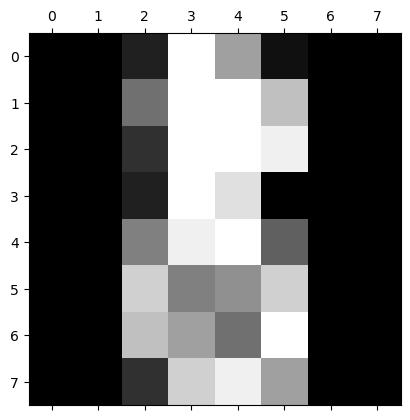

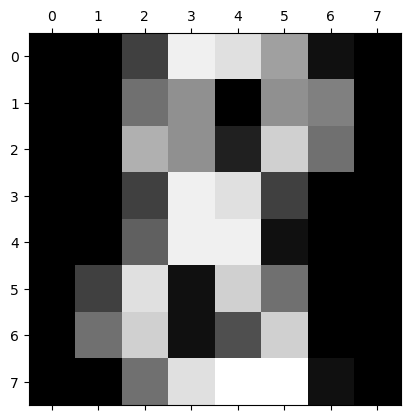

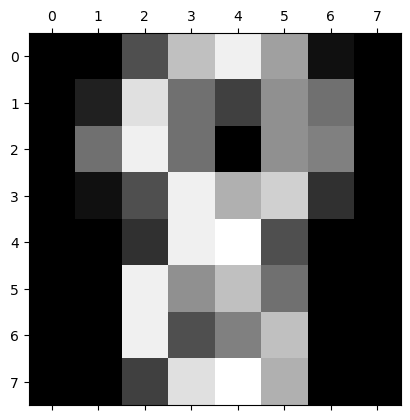

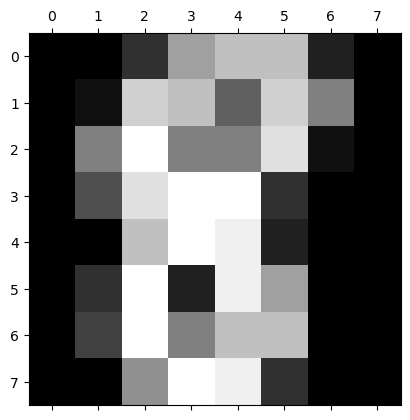

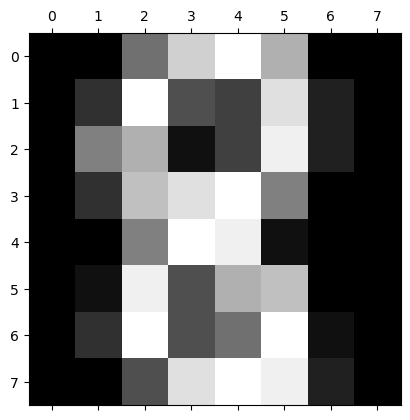

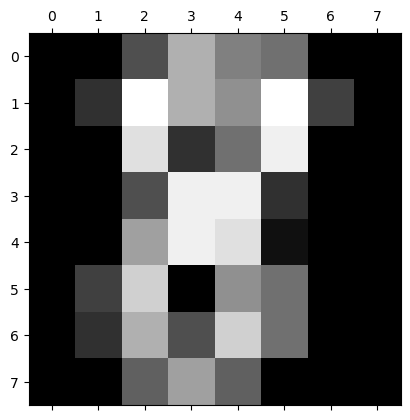

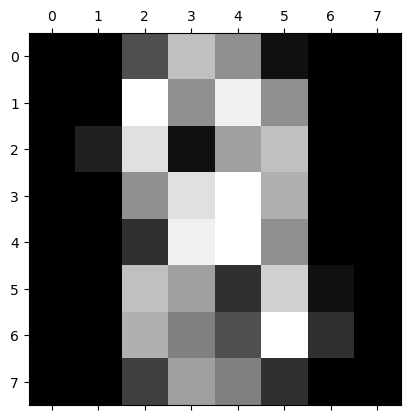

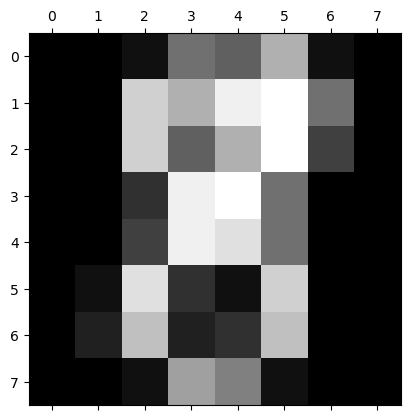

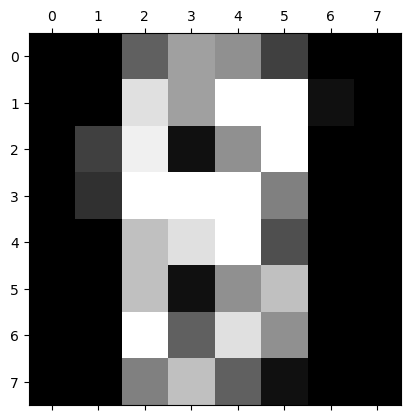

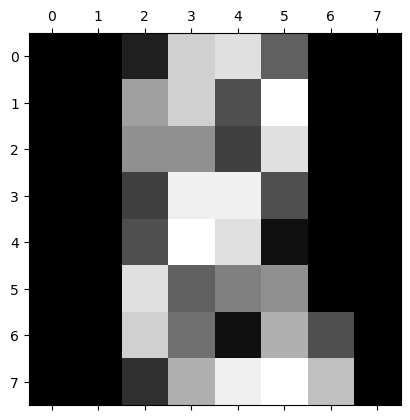

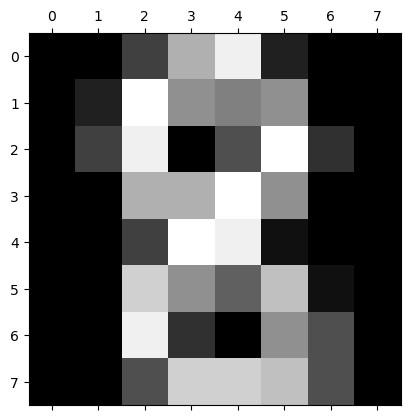

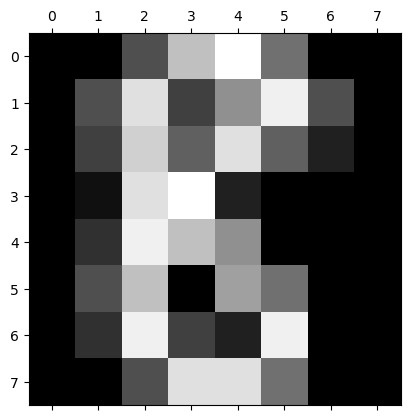

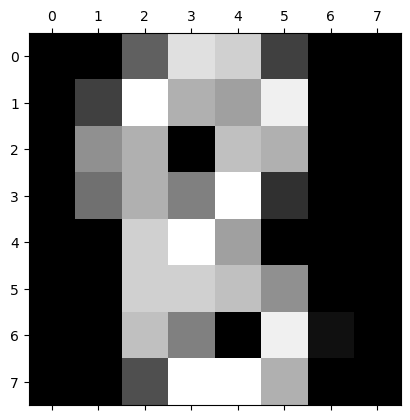

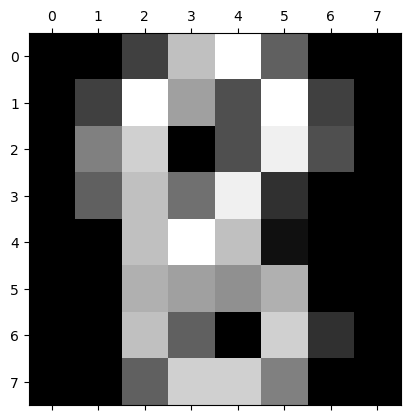

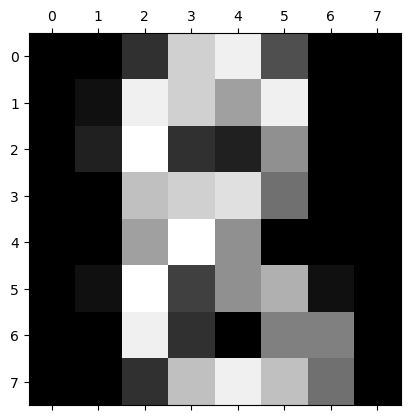

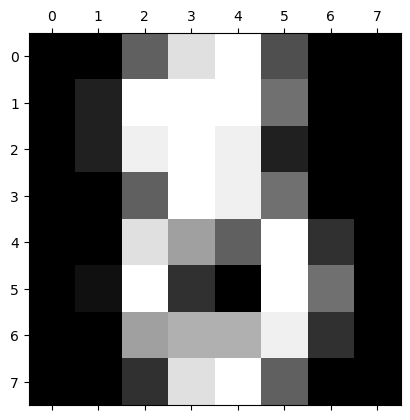

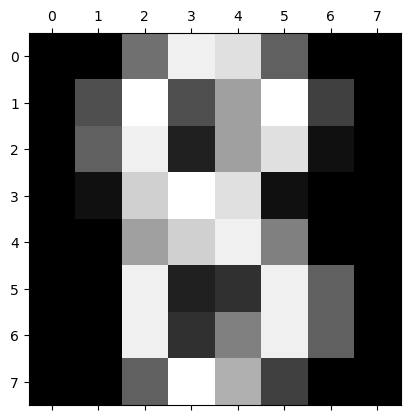

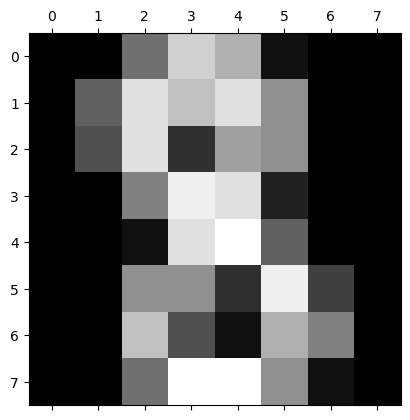

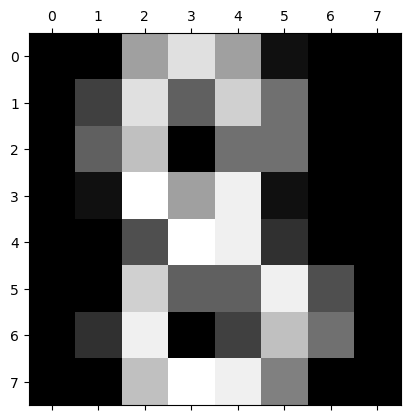

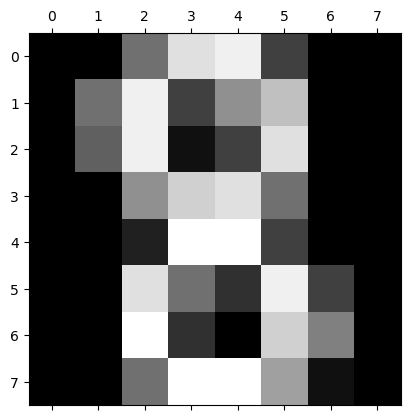

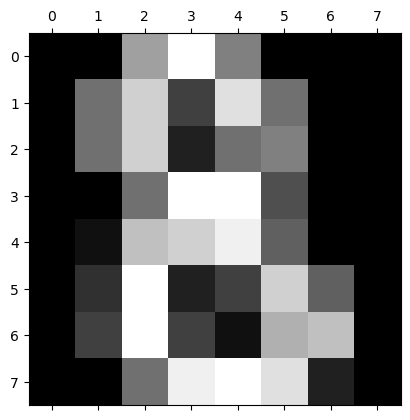

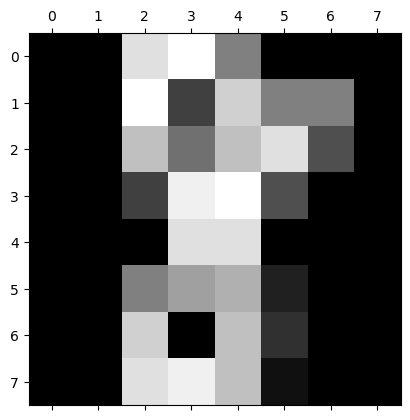

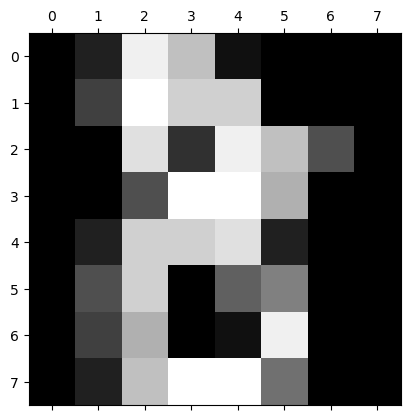

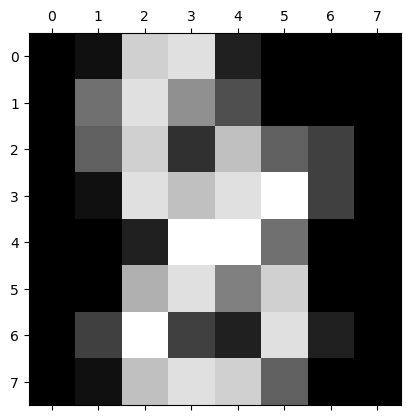

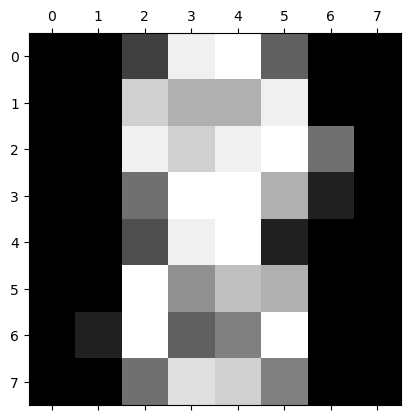

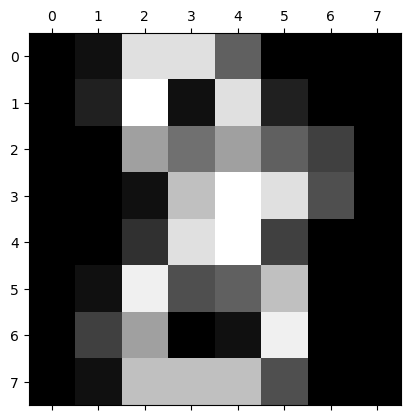

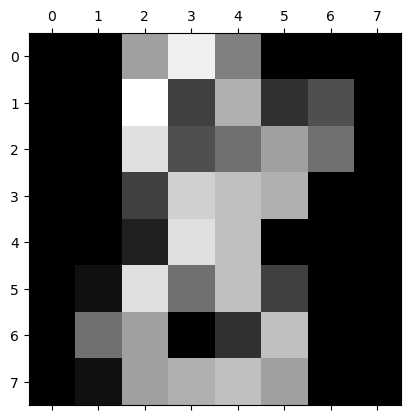

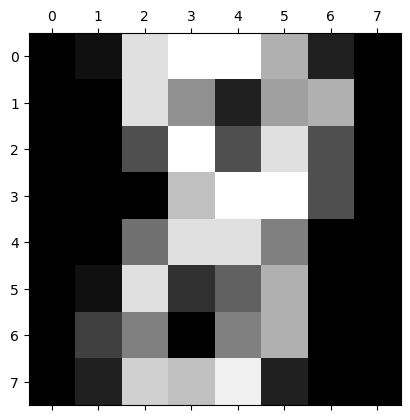

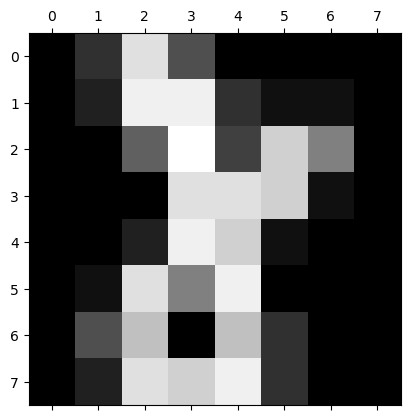

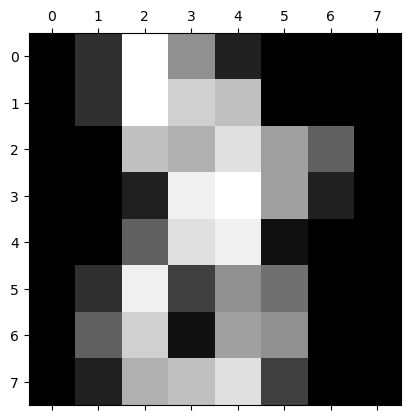

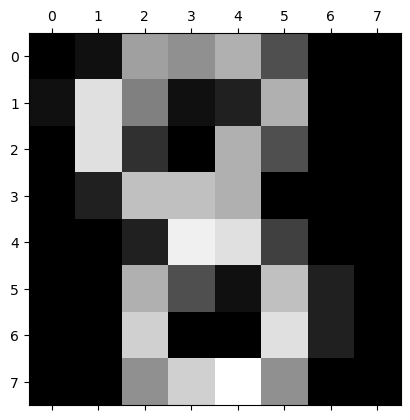

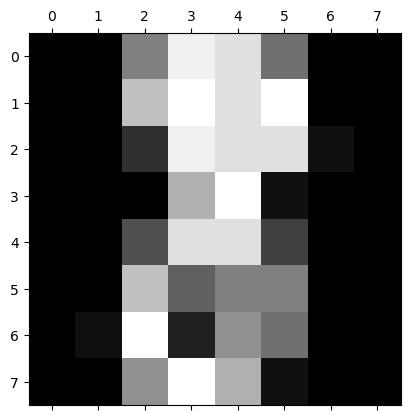

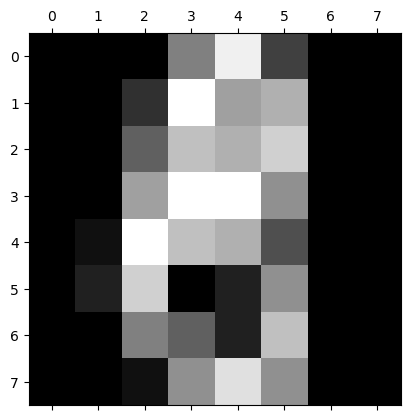

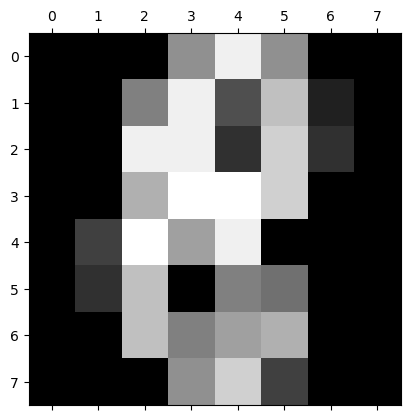

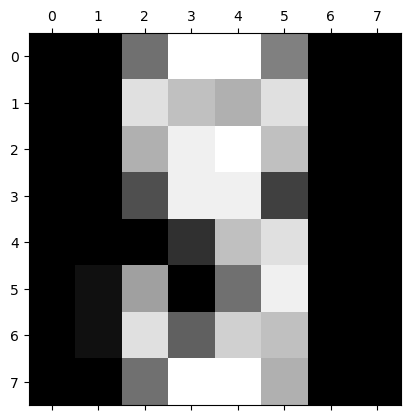

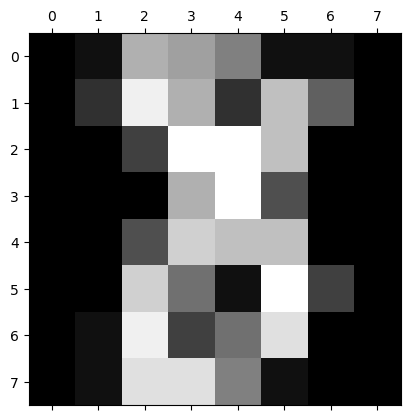

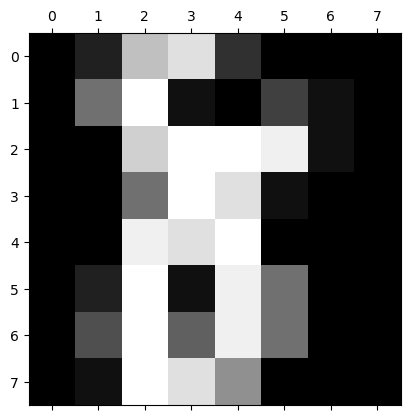

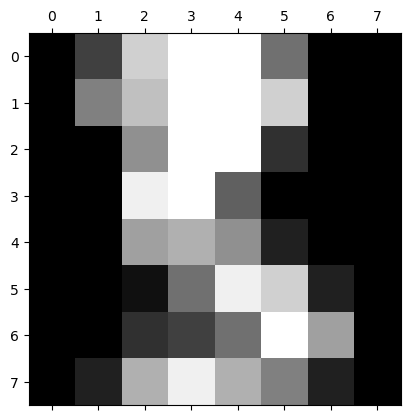

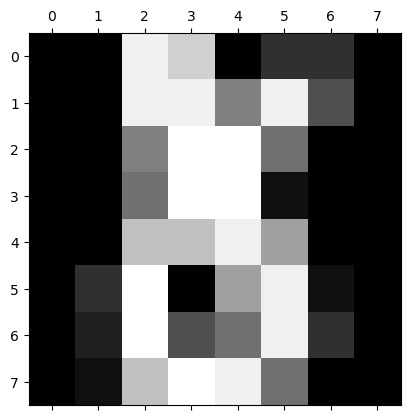

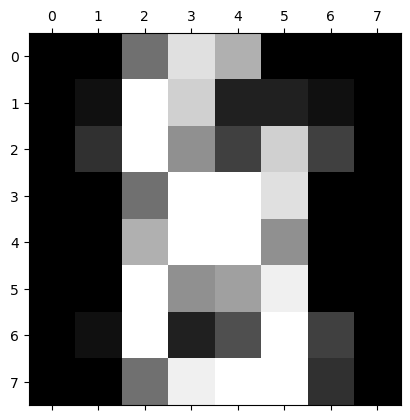

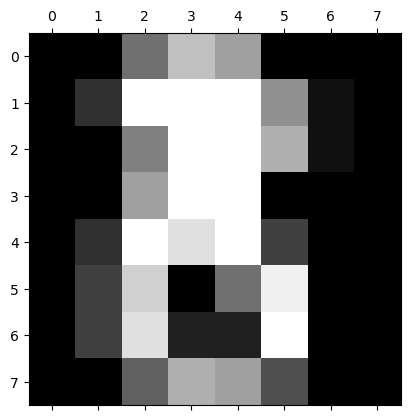

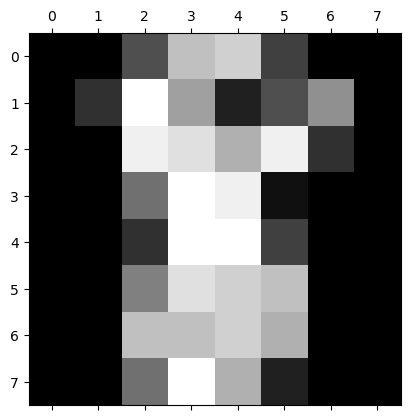

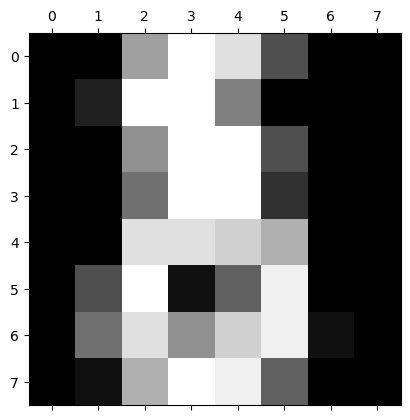

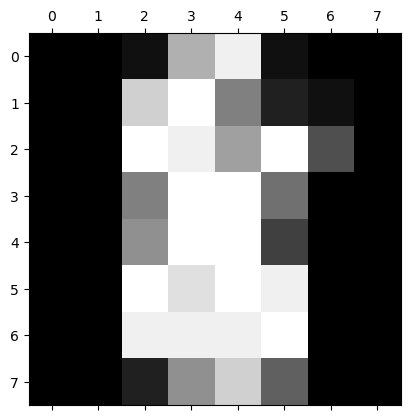

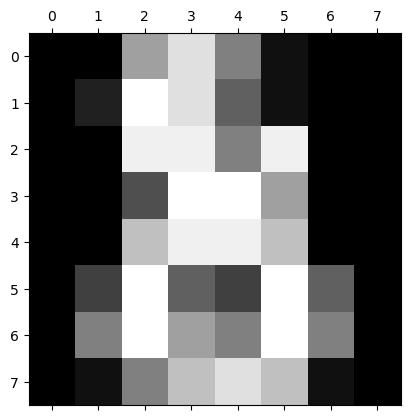

In [13]:
from collections import Counter
j = 2   # cluster number
# use cluster_assignment
# digits.target is actual label of images
#print(cluster_assignment)
#print(flatten_images)
cluster_counter=Counter()
images=[]
for i, cluster in enumerate(cluster_assignment):
    if cluster == j:
        if digits.target[i] not in cluster_counter:
            cluster_counter[digits.target[i]] = 0
        cluster_counter[digits.target[i]]+=1
        images.append(digits.images[i])
dominant_entry = cluster_counter.most_common(1)[0]


print('dominant entry: ',dominant_entry)

for image in images:
    plt.matshow(image)
plt.show()
## BEGIN WORK

    


### Task 3.2 Error rate
In the previous task we found the images belonging to a specific cluster. We also looked at the images to see what they look like. In this task, we will actually use the original labels of the images to see error rate in a specific cluster. We define the error rate as the ratio of **(all digits - number_of_dominant_digit_in_the cluster)/ all digits** in the cluster. For example, if the cluter had a total of 100 elements and 80 of them were the same digit (say 2), the the error rate is (100-80)/100 = 0.2. Compute the error rate of first 20 clusters and also print the dominant digit of the cluster.

In [31]:
## BEGIN WORK
from collections import Counter
# digits.target is actual label of images
cluster_digit_counter={}
most_common=[] 
for i in range(20):
    cluster_counter = Counter()
    total_digits = 0
    for j,cluster in enumerate(cluster_assignment):
        if cluster == i:
            cluster_counter[digits.target[j]]+=1
            total_digits+=1
    dominant_digit,count = cluster_counter.most_common(1)[0]
    most_common.append(dominant_digit) # most common shows dominant label in each cluster
    error_rate = (total_digits-count)/total_digits
    
    
    
    print('Cluster: ',i)
    print('Most dominant digit: ', dominant_digit)
    print('Error rate:',error_rate)


for image in images:
    plt.matshow(image)
plt.show()
## BEGIN WORK

    

print(cluster_assignment)
#most_common

Cluster:  0
Most dominant digit:  9
Error rate: 0.022222222222222223
Cluster:  1
Most dominant digit:  0
Error rate: 0.03636363636363636
Cluster:  2
Most dominant digit:  8
Error rate: 0.037037037037037035
Cluster:  3
Most dominant digit:  8
Error rate: 0.4642857142857143
Cluster:  4
Most dominant digit:  6
Error rate: 0.0
Cluster:  5
Most dominant digit:  3
Error rate: 0.0136986301369863
Cluster:  6
Most dominant digit:  7
Error rate: 0.15217391304347827
Cluster:  7
Most dominant digit:  4
Error rate: 0.03571428571428571
Cluster:  8
Most dominant digit:  1
Error rate: 0.0
Cluster:  9
Most dominant digit:  6
Error rate: 0.017857142857142856
Cluster:  10
Most dominant digit:  0
Error rate: 0.008
Cluster:  11
Most dominant digit:  3
Error rate: 0.02666666666666667
Cluster:  12
Most dominant digit:  6
Error rate: 0.013333333333333334
Cluster:  13
Most dominant digit:  5
Error rate: 0.010416666666666666
Cluster:  14
Most dominant digit:  4
Error rate: 0.42857142857142855
Cluster:  15
Most 

### Task 3.3 Best predicted Clusters
If the error rate of a specific cluster is almost zero, then they are the best predicted clusters. Which clusters are the best predicted in 3.2?
Also, run 3.1 with those cluster numbers to see if almost all digits in the cluster are the same and predicted accurately.

The best predicted clusters are 19,12,13,11, and 9.

## Part 4 - Number of Clusters
One of the most challenging part of clustering is to determine the minimum number of clusters required to solve the problem. In this case, we know, ideally we need 10 clusters. But with k=10, we may not get a unique dominant integer in a each cluster. So In this part, we will explore ways to determine the minimum value of k, that can give us k clusters that contains all digits 0..9. 

### Task 4.1 Finding a minimum k 
It may be the case that if we go with k=10, we may not find that 10 cluster centers do not represent the digits from 0...9. Instead we may have to increase k, in order to find a k where each center is now representing one of 0...9. In this task, find the minium k, where each cluster will be dominated by one of 0..9. 

In [38]:
# complete the function
    # while each of the digits isn't represented
    # use set to find unique digits
    # keep increasing k 
def first_index_with_all_integers(k):
    all_digits=set()
    while len(all_digits) != 10:
        #cluster_assignment = kmeans_alt(flatten_images,k)
        for i in range(k):
            # find dominant digits in each cluster
            cluster_counter = Counter()
            for j,cluster in enumerate(cluster_assignment):
                if cluster == i:
                    cluster_counter[digits.target[j]]+=1        
            dominant_digit, count = cluster_counter.most_common(1)[0]
            all_digits.add(dominant_digit)
        print(all_digits)
        if len(all_digits) < 10:
            k+=1
    return k

min_k = first_index_with_all_integers(k)
min_k

{0, 1, 3, 4, 6, 7, 8, 9}
{0, 1, 3, 4, 6, 7, 8, 9}
{0, 1, 3, 4, 6, 7, 8, 9}
{0, 1, 3, 4, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


25

### Task 4.2 Print the cluster centers for some reasonable k
Using the minimum k found above, print the cluster centers as 8x8 images. Inspect the images to see if we get all the digits from 0..9 represented by cluster means.

/tmp/ipykernel_467932/4151559897.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(center)


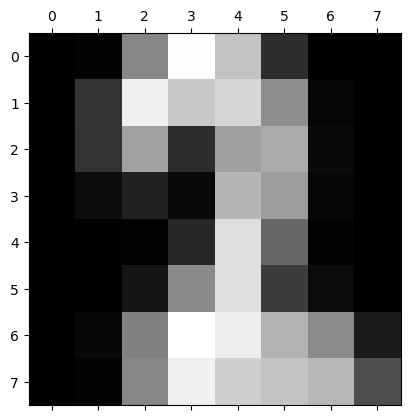

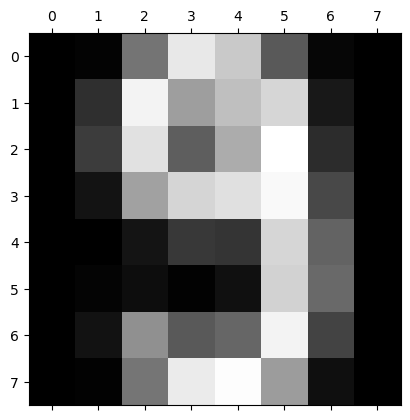

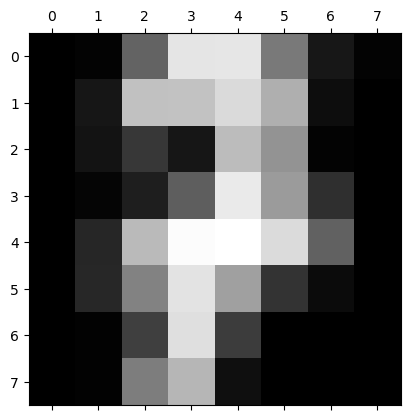

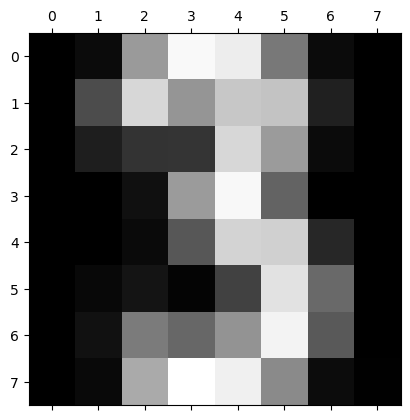

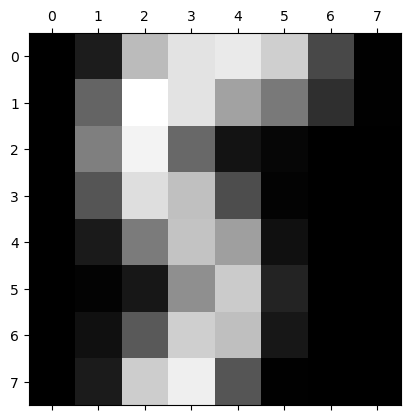

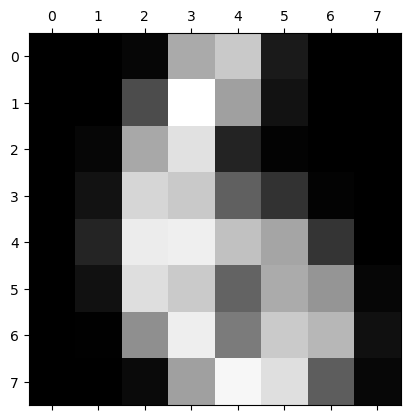

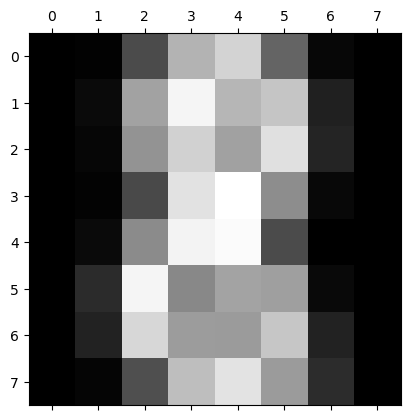

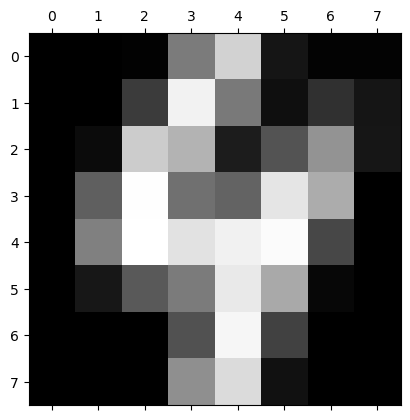

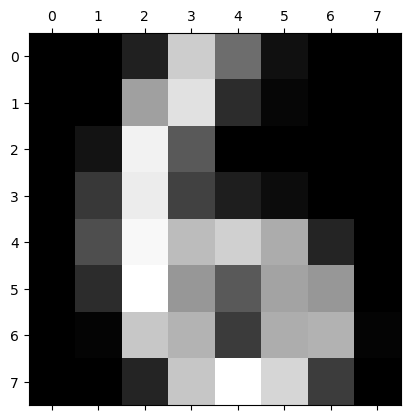

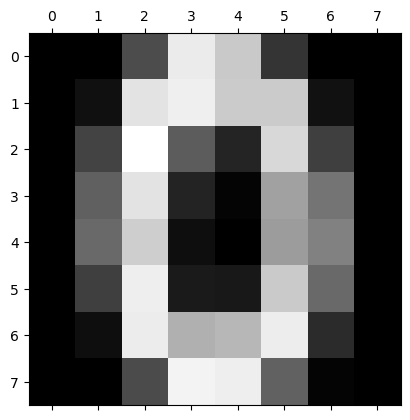

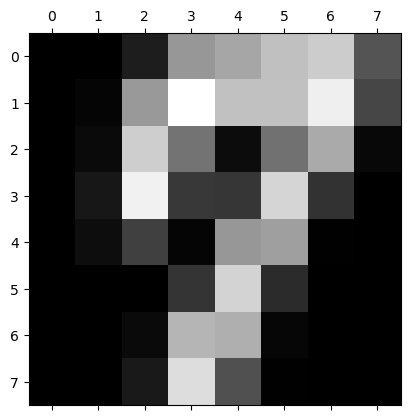

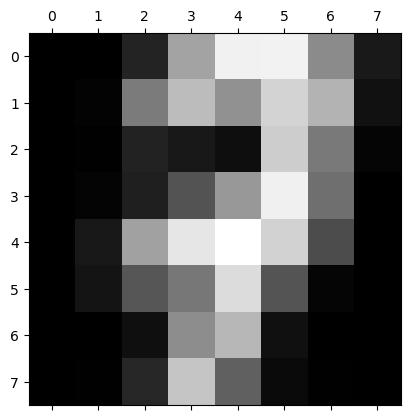

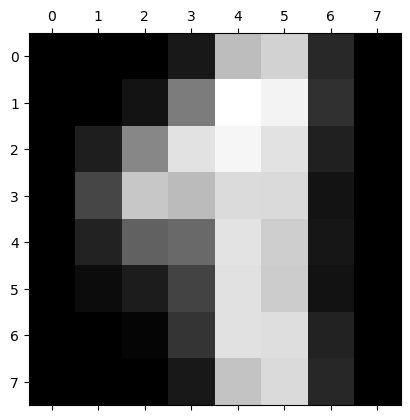

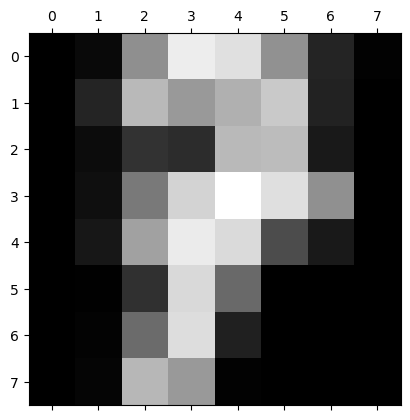

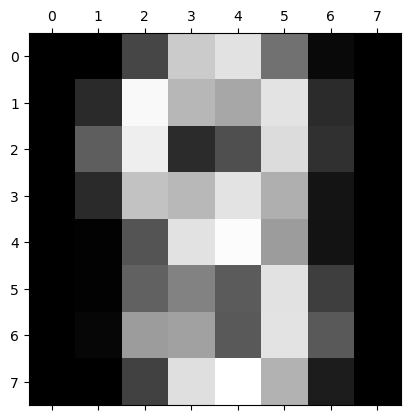

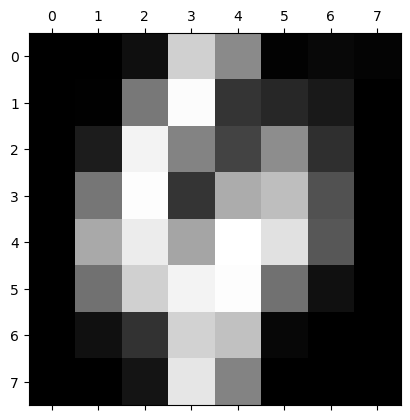

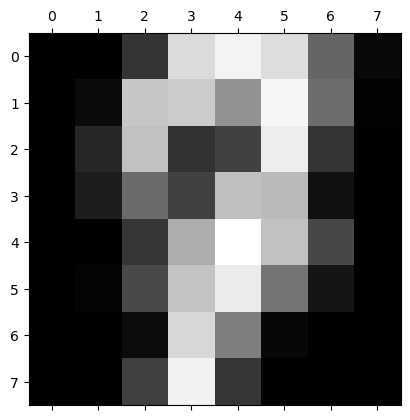

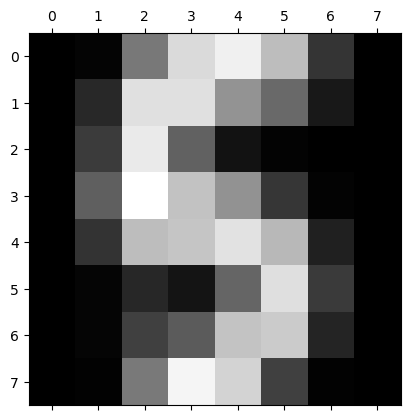

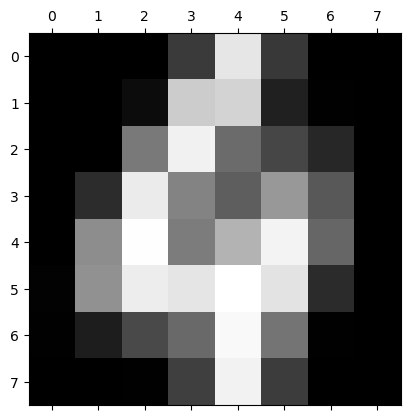

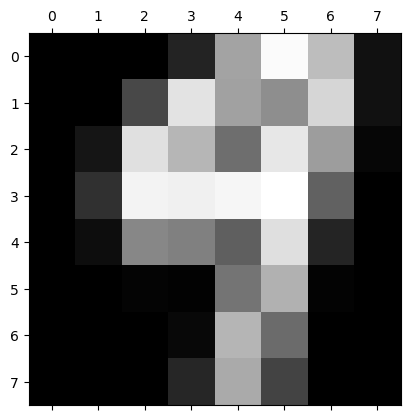

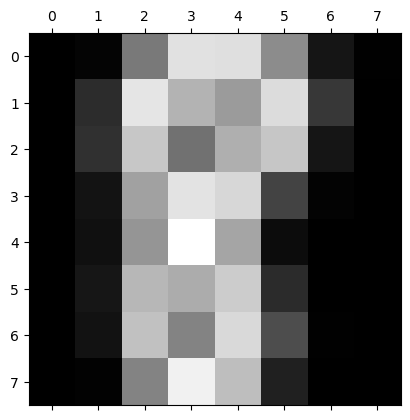

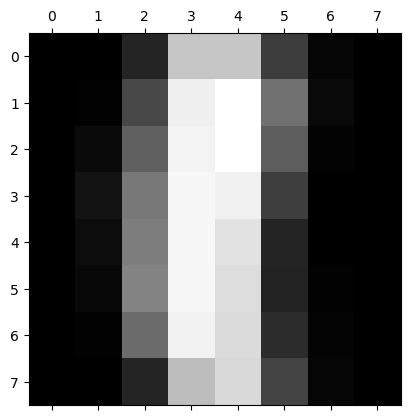

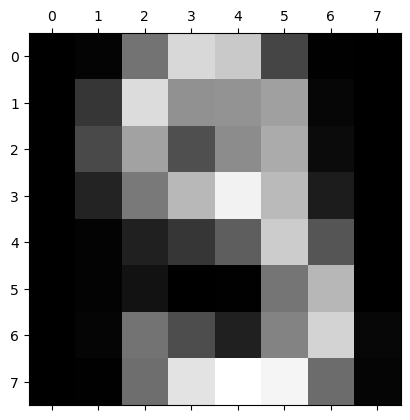

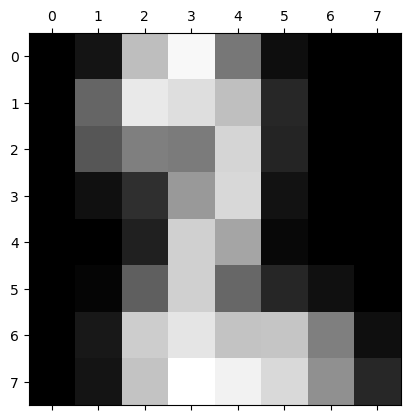

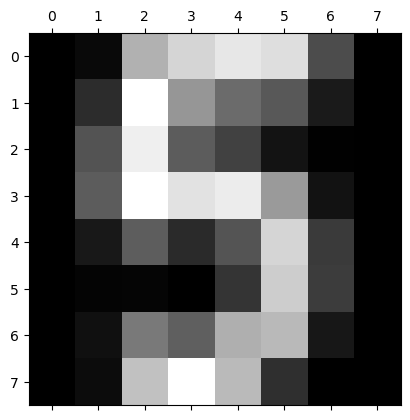

In [47]:
# complete code below
cluster_assignment,Mu,_ = kmeans_alt(flatten_images,min_k)

centers = Mu.reshape(min_k,8,8)

for center in centers:
    plt.matshow(center)
plt.show()


### Question. 
Do you see all digits 0...9 are closely represented by the cluster centers with k found above? Please explain.

Yes, it seems that digits 0..9 are too closely represented by cluster centers with k found above.
This is an example of overfitting that might lead to some different handwritten variations of the same digit (4 and 1 as example) not being represented well.

### Task 4.3 Finding a good k by plotting
Finding a k is often context dependent. Ideally, in this case, we would like to group handwritten digits into 10 clusters. But, as seen in previous task, we may need more than 10 clusters to capture all digits. In this task, we will plot the k vs loss to see if we can get some idea about the minimum k. 

### Find vectors loss and k

In [54]:
lower_k=2
upper_k=30
x=[]
y=[]
for k in range(lower_k,upper_k+1):
    # find loss for each k
    cluster_assignment,Mu,loss = kmeans_alt(flatten_images,k=k)
    x.append(k)
    y.append(loss)
        


### Plot Loss vs k

Text(0.5, 1.0, 'Loss vs. Num Clusters (k)')

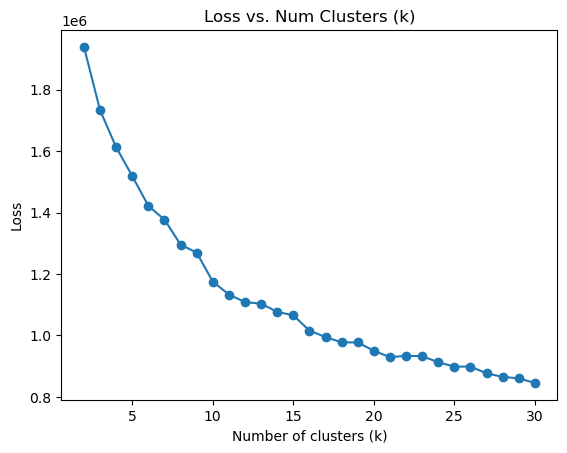

In [55]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(x,y,marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Loss')
plt.title('Loss vs. Num Clusters (k)')

## solution below



### Task 4.4 What is the optimal K?
Do the value of k agree with what you got in task 4.1? if you have to determine k just based on the loss, what k would you select? 

If I had to determine k based on loss, then I would choose a k of 16. This seems to agree with what was found in task 4.1, where after k=13 the clusters seemed to mostly accurately represent the numbers.
It seems that the difference in loss from cluster to cluster seems to diminish after k=10, after which it only decreases about .4 for the next 20 clusters.

## Part 5 - Timing kmeans
In this part, we will examine the efficiency of kmeans matrix and kmeans_alt implementations. We will also plot the size of the data set vs timing for some k=optimal as found in 4.1

### Task 5.1 Convergence and timing kmeans with matrix implementation.
kmeans_matrix is the matrix implementation of k-means as completed in 2.3.2. In this task, record the time to run kmeans_matrix for k=10,11,...30. Record the (time in seconds,loss) in each case in the following format. Note that each time you run, you may get a different set of values as the initial assignment of the cluster centers is random

k= 10   loss =  1171412  time= 0.06305670738220215  secs

You should see loss going down as you increase the number of clusters. But it is possible that loss may not decrease for ever as adding more clusters may not always lead to a better clustering solution. This is because some of the cluster centers may end up being very close to each other, resulting in a decrease in the overall separation of the clusters. Eventually, adding more clusters can cause the k-means algorithm to overfit the data, resulting in an increase in the sum of squared distances. This is because the algorithm tries to assign each data point to its closest centroid, and with more clusters, it can end up assigning points to centroids that are not representative of the true underlying structure of the data.

In [ ]:
import time
## BEGIN WORK
for k in range(10,31):
    start_time = time.time()
    Mu,loss = kmeans_matrix(flatten_images,k)
    end_time = time.time() - start_time
    print(f'k={k}     loss={loss}     time= {end_time} secs') 



### Task 5.2 Convergence and Timing kmeans with kmeans_alt
Do the same with kmeans_alt, the alternate implementation of k-means to see if there is a noticeable difference between the two implementations.

In [60]:
import time
## BEGIN WORK
for k in range(10,31):
    start_time = time.time()
    _,Mu,loss = kmeans_alt(flatten_images,k)
    end_time = time.time() - start_time
    print(f'k={k}     loss={loss}     time= {end_time} secs') 



k=10     loss=1195459.3401508029     time= 0.2776639461517334 secs
k=11     loss=1138858.3033650008     time= 0.16039180755615234 secs
k=12     loss=1129075.8189449143     time= 0.07811903953552246 secs
k=13     loss=1093741.8513474017     time= 0.16381025314331055 secs
k=14     loss=1053560.9895083026     time= 0.21110320091247559 secs
k=15     loss=1061994.8908327436     time= 0.19691801071166992 secs
k=16     loss=1013552.4607809316     time= 0.2585322856903076 secs
k=17     loss=991483.9301136675     time= 0.30403780937194824 secs
k=18     loss=975891.2934899232     time= 0.17568063735961914 secs
k=19     loss=978426.0570437373     time= 0.2308049201965332 secs
k=20     loss=970096.5679654309     time= 0.2239222526550293 secs
k=21     loss=969497.321068147     time= 0.188065767288208 secs
k=22     loss=933979.0627583516     time= 0.3192272186279297 secs
k=23     loss=929947.3939142714     time= 0.24648642539978027 secs
k=24     loss=916522.4380470741     time= 0.5185027122497559 se

### Task 5.3: Plotting data size vs time
Run the kmeans_matrix or kmeans_alt algorithm for variying data sizes for k=optimal (as determined above) and plot the graph of x-axis(size of data m) and y-axis(time). Vary the size of the data set from m=100, 200, ...., 1000. Does the graph confirm the complexity of the algorithm as estimated above? Explain.

In [ ]:
import random
import math
k=18
x=[]
y=[]
## BEGIN WORK
dataset_sizes = np.linspace(100,1000,10,dtype=int)

for size in data_sizes:
    


print(x)
print(y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# use x and y vectors from previous part
x = x
y = y

## BEGIN WORK




### Task 5.4  Observations
Based on the observations from the graph, how does the time to run kmeans algorithm increase with data size? (logarithm, linear, quadratic etc..). Does this observation confirms the complexity analysis you did in task 2.1? Explain below

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-10, 10-highest) :
6
* how can we improve his lab? :
I found that while the lab and questions were interesting, I spent hours of time trying to understand exactly what each question was asking, as well as trying to see how the output was formatted. 

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_Lab5.ipynb<br>
<b> Submit To: </b> CodeBench <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

##### Lab developed by A.D. Gunawardena @ 2024      ---           @All Rights Reserved     ---                DO NOT POST or SHARE this lab outside CS439 or in public forums